In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
multi_act = pd.read_csv("ATUS DATA 03-19/atus_activity_0319.dat", 
                        dtype= {"TRCODEP": object, "TRTIER1P": object, "TRTIER2P": object}) #using 2003-2019 activity file
#multi_act

In [3]:
multi_rost = pd.read_csv("ATUS DATA 03-19/atus_rost_0319.dat")

#TERRP = How is this person related to you?
# "There is no distinction between 18 and 19"
roster_list = [18,19] # 18 and 19 = self 
multi_rost = multi_rost[multi_rost["TERRP"].isin(roster_list)]
#multi_rost.head(20)

In [4]:
multi_resp = pd.read_csv("ATUS DATA 03-19/atus_resp_0319.dat")
#multi_resp.columns.to_list()

In [5]:
multi_merged1 = pd.merge(multi_act, multi_resp, on="TUCASEID")
multi_merged = pd.merge(multi_merged1, multi_rost, on="TUCASEID")
#multi_merged = pd.merge(multi_resp, multi_rost, on="TUCASEID")
multi_merged = multi_merged.filter(["TUCASEID","TUACTDUR24","TUCUMDUR","TRTIER1P","TRTIER2P","TRCODEP", 
                                    "TEWHERE","TEAGE", "TUFNWGTP","TUSTARTTIM","TUSTOPTIME", "TUYEAR"])
#multi_merged.head(20)

## Age Between 25 and 64  Population

In [6]:
#p25_64_codes = [3,4] # 3= Age Between 25 and 64  - on layoff, 3 = Age Between 25 and 64  - looking
#multi_merged_p25_64 = multi_merged[multi_merged["TELFS"].isin(p25_64_codes)]
#multi_merged_p25_64["TELFS"].unique()

multi_merged_p25_64 = multi_merged[(multi_merged["TEAGE"] >= 25) & (multi_merged["TEAGE"] <= 64)]
multi_merged_p25_64

,TUCASEID,TUACTDUR24,TUCUMDUR,TRTIER1P,TRTIER2P,TRCODEP,TEWHERE,TEAGE,TUFNWGTP,TUSTARTTIM,TUSTOPTIME,TUYEAR
0,20030100013280,60,60,13,1301,130124,9,60,8.155463e+06,04:00:00,05:00:00,2003
1,20030100013280,30,90,01,0102,010201,-1,60,8.155463e+06,05:00:00,05:30:00,2003
2,20030100013280,600,690,01,0101,010101,-1,60,8.155463e+06,05:30:00,15:30:00,2003
3,20030100013280,150,840,12,1203,120303,1,60,8.155463e+06,15:30:00,18:00:00,2003
4,20030100013280,5,845,11,1101,110101,1,60,8.155463e+06,18:00:00,18:05:00,2003
...,...,...,...,...,...,...,...,...,...,...,...,...
4121278,20191212192270,98,690,03,0301,030103,1,45,1.072172e+07,13:52:00,15:30:00,2019
4121279,20191212192270,30,720,18,1812,181201,13,45,1.072172e+07,15:30:00,16:00:00,2019
4121280,20191212192270,390,1110,12,1201,120101,3,45,1.072172e+07,16:00:00,22:30:00,2019
4121281,20191212192270,30,1140,18,1812,181201,13,45,1.072172e+07,22:30:00,23:00:00,2019


In [7]:
p25_64_2003 = multi_merged_p25_64[multi_merged_p25_64["TUCASEID"].apply(str).str.startswith("2003")]
atus_2003_p25_64_weight = p25_64_2003.drop_duplicates(subset=["TUCASEID"])
atus_2003_p25_64_weight = atus_2003_p25_64_weight["TUFNWGTP"].sum()
atus_2003_p25_64_weight

55122702385.53839

## 2003-2019 Residential - Age Between 25 and 64 

In [8]:
#only residential location from 2003-2019
residential_location = [-1,1,3]
atus_multi_yr_res_p25_64 = multi_merged_p25_64[multi_merged_p25_64["TEWHERE"].isin(residential_location)]
#atus_multi_yr_res_p25_64

In [9]:
#atus residential year seperation by p25_64 population 
atus_2003_res_p25_64 = atus_multi_yr_res_p25_64[atus_multi_yr_res_p25_64["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_res_p25_64 = atus_multi_yr_res_p25_64[atus_multi_yr_res_p25_64["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_res_p25_64 = atus_multi_yr_res_p25_64[atus_multi_yr_res_p25_64["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_res_p25_64 = atus_multi_yr_res_p25_64[atus_multi_yr_res_p25_64["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_res_p25_64 = atus_multi_yr_res_p25_64[atus_multi_yr_res_p25_64["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_res_p25_64 = atus_multi_yr_res_p25_64[atus_multi_yr_res_p25_64["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_res_p25_64 = atus_multi_yr_res_p25_64[atus_multi_yr_res_p25_64["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_res_p25_64 = atus_multi_yr_res_p25_64[atus_multi_yr_res_p25_64["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_res_p25_64 = atus_multi_yr_res_p25_64[atus_multi_yr_res_p25_64["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_res_p25_64 = atus_multi_yr_res_p25_64[atus_multi_yr_res_p25_64["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_res_p25_64 = atus_multi_yr_res_p25_64[atus_multi_yr_res_p25_64["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_res_p25_64 = atus_multi_yr_res_p25_64[atus_multi_yr_res_p25_64["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_res_p25_64 = atus_multi_yr_res_p25_64[atus_multi_yr_res_p25_64["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_res_p25_64 = atus_multi_yr_res_p25_64[atus_multi_yr_res_p25_64["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_res_p25_64 = atus_multi_yr_res_p25_64[atus_multi_yr_res_p25_64["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_res_p25_64 = atus_multi_yr_res_p25_64[atus_multi_yr_res_p25_64["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_res_p25_64 = atus_multi_yr_res_p25_64[atus_multi_yr_res_p25_64["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_res_p25_64.head(30)

### 2003 All Residential Activities - Age Between 25 and 64  Population

In [10]:
atus_2003_all_res_p25_64 = atus_2003_res_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2003_all_res_p25_64

,TUACTDUR24
TUCASEID,
20030100013280,1240
20030100013344,1420
20030100013352,1370
20030100013848,1440
20030100014165,677
...,...
20031212033591,1230
20031212033597,907
20031212033621,872


In [11]:
atus_2003_all_res_p25_64_merge = pd.merge(atus_2003_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2003_all_res_p25_64_merge

,TUCASEID,TUACTDUR24,TUFNWGTP
0,20030100013280,1240,8.155463e+06
1,20030100013344,1420,1.735323e+06
2,20030100013352,1370,3.830527e+06
3,20030100013848,1440,6.622023e+06
4,20030100014165,677,3.068387e+06
...,...,...,...
14769,20031212033591,1230,1.731625e+06
14770,20031212033597,907,3.575899e+06
14771,20031212033621,872,6.004256e+06
14772,20031212033636,1185,1.402276e+06


In [12]:
atus_2003_all_res_p25_64_merge["Multiplied Weight"] = atus_2003_all_res_p25_64_merge["TUACTDUR24"] * atus_2003_all_res_p25_64_merge["TUFNWGTP"]
#atus_2003_all_res_p25_64_merge

In [13]:
atus_2003_all_res_p25_64_multiplied_weight = atus_2003_all_res_p25_64_merge["Multiplied Weight"].sum()
atus_2003_all_res_p25_64_multiplied_weight

55368017493239.59

In [14]:
p25_64_2003 = multi_merged_p25_64[multi_merged_p25_64["TUCASEID"].apply(str).str.startswith("2003")]
atus_2003_p25_64_weight = p25_64_2003.drop_duplicates(subset=["TUCASEID"])
atus_2003_p25_64_weight = atus_2003_p25_64_weight["TUFNWGTP"].sum()
atus_2003_p25_64_weight

55122702385.53839

In [15]:
all_act_2003_res_p25_64_hpd = atus_2003_all_res_p25_64_multiplied_weight / atus_2003_p25_64_weight / 60
all_act_2003_res_p25_64_hpd

16.740839102911846

### 2004 All Residential Activities - Age Between 25 and 64  Population

In [16]:
atus_2004_all_res_p25_64 = atus_2004_res_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_all_res_p25_64

In [17]:
atus_2004_all_res_p25_64_merge = pd.merge(atus_2004_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2004_all_res_p25_64_merge["Multiplied Weight"] = atus_2004_all_res_p25_64_merge["TUACTDUR24"] * atus_2004_all_res_p25_64_merge["TUFNWGTP"]
#atus_2004_all_res_p25_64_merge

In [18]:
p25_64_2004 = multi_merged_p25_64[multi_merged_p25_64["TUCASEID"].apply(str).str.startswith("2004")]
atus_2004_p25_64_weight = p25_64_2004.drop_duplicates(subset=["TUCASEID"])
atus_2004_p25_64_weight = atus_2004_p25_64_weight["TUFNWGTP"].sum()

atus_2004_all_res_p25_64_multiplied_weight = atus_2004_all_res_p25_64_merge["Multiplied Weight"].sum()

In [19]:
all_act_2004_res_p25_64_hpd = atus_2004_all_res_p25_64_multiplied_weight / atus_2004_p25_64_weight / 60
all_act_2004_res_p25_64_hpd

16.75057902276908

### 2005 All Residential Activities - Age Between 25 and 64  Population

In [20]:
atus_2005_all_res_p25_64 = atus_2005_res_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_all_res_p25_64

In [21]:
atus_2005_all_res_p25_64_merge = pd.merge(atus_2005_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2005_all_res_p25_64_merge["Multiplied Weight"] = atus_2005_all_res_p25_64_merge["TUACTDUR24"] * atus_2005_all_res_p25_64_merge["TUFNWGTP"]
#atus_2005_all_res_p25_64_merge

In [22]:
p25_64_2005 = multi_merged_p25_64[multi_merged_p25_64["TUCASEID"].apply(str).str.startswith("2005")]
atus_2005_p25_64_weight = p25_64_2005.drop_duplicates(subset=["TUCASEID"])
atus_2005_p25_64_weight = atus_2005_p25_64_weight["TUFNWGTP"].sum()

atus_2005_all_res_p25_64_multiplied_weight = atus_2005_all_res_p25_64_merge["Multiplied Weight"].sum()

In [23]:
all_act_2005_res_p25_64_hpd = atus_2005_all_res_p25_64_multiplied_weight / atus_2005_p25_64_weight / 60
all_act_2005_res_p25_64_hpd

16.773331494431346

### 2006 All Residential Activities - Age Between 25 and 64  Population

In [24]:
atus_2006_all_res_p25_64 = atus_2006_res_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_all_res_p25_64

In [25]:
atus_2006_all_res_p25_64_merge = pd.merge(atus_2006_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2006_all_res_p25_64_merge["Multiplied Weight"] = atus_2006_all_res_p25_64_merge["TUACTDUR24"] * atus_2006_all_res_p25_64_merge["TUFNWGTP"]
#atus_2006_all_res_p25_64_merge

In [26]:
p25_64_2006 = multi_merged_p25_64[multi_merged_p25_64["TUCASEID"].apply(str).str.startswith("2006")]
atus_2006_p25_64_weight = p25_64_2006.drop_duplicates(subset=["TUCASEID"])
atus_2006_p25_64_weight = atus_2006_p25_64_weight["TUFNWGTP"].sum()

atus_2006_all_res_p25_64_multiplied_weight = atus_2006_all_res_p25_64_merge["Multiplied Weight"].sum()

In [27]:
all_act_2006_res_p25_64_hpd = atus_2006_all_res_p25_64_multiplied_weight / atus_2006_p25_64_weight / 60
all_act_2006_res_p25_64_hpd

16.7303037220374

### 2007 All Residential Activities - Age Between 25 and 64  Population

In [28]:
atus_2007_all_res_p25_64 = atus_2007_res_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_all_res_p25_64

In [29]:
atus_2007_all_res_p25_64_merge = pd.merge(atus_2007_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2007_all_res_p25_64_merge["Multiplied Weight"] = atus_2007_all_res_p25_64_merge["TUACTDUR24"] * atus_2007_all_res_p25_64_merge["TUFNWGTP"]
#atus_2007_all_res_p25_64_merge

In [30]:
p25_64_2007 = multi_merged_p25_64[multi_merged_p25_64["TUCASEID"].apply(str).str.startswith("2007")]
atus_2007_p25_64_weight = p25_64_2007.drop_duplicates(subset=["TUCASEID"])
atus_2007_p25_64_weight = atus_2007_p25_64_weight["TUFNWGTP"].sum()

atus_2007_all_res_p25_64_multiplied_weight = atus_2007_all_res_p25_64_merge["Multiplied Weight"].sum()

In [31]:
all_act_2007_res_p25_64_hpd = atus_2007_all_res_p25_64_multiplied_weight / atus_2007_p25_64_weight / 60
all_act_2007_res_p25_64_hpd

16.78903176097087

### 2008 All Residential Activities - Age Between 25 and 64  Population

In [32]:
atus_2008_all_res_p25_64 = atus_2008_res_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_all_res_p25_64

In [33]:
atus_2008_all_res_p25_64_merge = pd.merge(atus_2008_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2008_all_res_p25_64_merge["Multiplied Weight"] = atus_2008_all_res_p25_64_merge["TUACTDUR24"] * atus_2008_all_res_p25_64_merge["TUFNWGTP"]
#atus_2008_all_res_p25_64_merge

In [34]:
p25_64_2008 = multi_merged_p25_64[multi_merged_p25_64["TUCASEID"].apply(str).str.startswith("2008")]
atus_2008_p25_64_weight = p25_64_2008.drop_duplicates(subset=["TUCASEID"])
atus_2008_p25_64_weight = atus_2008_p25_64_weight["TUFNWGTP"].sum()

atus_2008_all_res_p25_64_multiplied_weight = atus_2008_all_res_p25_64_merge["Multiplied Weight"].sum()

In [35]:
all_act_2008_res_p25_64_hpd = atus_2008_all_res_p25_64_multiplied_weight / atus_2008_p25_64_weight / 60
all_act_2008_res_p25_64_hpd

16.96508978153347

### 2009 All Residential Activities - Age Between 25 and 64  Population

In [36]:
atus_2009_all_res_p25_64 = atus_2009_res_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_all_res_p25_64

In [37]:
atus_2009_all_res_p25_64_merge = pd.merge(atus_2009_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2009_all_res_p25_64_merge["Multiplied Weight"] = atus_2009_all_res_p25_64_merge["TUACTDUR24"] * atus_2009_all_res_p25_64_merge["TUFNWGTP"]
#atus_2009_all_res_p25_64_merge

In [38]:
p25_64_2009 = multi_merged_p25_64[multi_merged_p25_64["TUCASEID"].apply(str).str.startswith("2009")]
atus_2009_p25_64_weight = p25_64_2009.drop_duplicates(subset=["TUCASEID"])
atus_2009_p25_64_weight = atus_2009_p25_64_weight["TUFNWGTP"].sum()

atus_2009_all_res_p25_64_multiplied_weight = atus_2009_all_res_p25_64_merge["Multiplied Weight"].sum()

In [39]:
all_act_2009_res_p25_64_hpd = atus_2009_all_res_p25_64_multiplied_weight / atus_2009_p25_64_weight / 60
all_act_2009_res_p25_64_hpd

17.154522304191467

### 2010 All Residential Activities - Age Between 25 and 64  Population

In [40]:
atus_2010_all_res_p25_64 = atus_2010_res_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_all_res_p25_64

In [41]:
atus_2010_all_res_p25_64_merge = pd.merge(atus_2010_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2010_all_res_p25_64_merge["Multiplied Weight"] = atus_2010_all_res_p25_64_merge["TUACTDUR24"] * atus_2010_all_res_p25_64_merge["TUFNWGTP"]
#atus_2010_all_res_p25_64_merge

In [42]:
p25_64_2010 = multi_merged_p25_64[multi_merged_p25_64["TUCASEID"].apply(str).str.startswith("2010")]
atus_2010_p25_64_weight = p25_64_2010.drop_duplicates(subset=["TUCASEID"])
atus_2010_p25_64_weight = atus_2010_p25_64_weight["TUFNWGTP"].sum()

atus_2010_all_res_p25_64_multiplied_weight = atus_2010_all_res_p25_64_merge["Multiplied Weight"].sum()

In [43]:
all_act_2010_res_p25_64_hpd = atus_2010_all_res_p25_64_multiplied_weight / atus_2010_p25_64_weight / 60
all_act_2010_res_p25_64_hpd

17.073206676348093

### 2011 All Residential Activities - Age Between 25 and 64  Population

In [44]:
atus_2011_all_res_p25_64 = atus_2011_res_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_all_res_p25_64

In [45]:
atus_2011_all_res_p25_64_merge = pd.merge(atus_2011_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2011_all_res_p25_64_merge["Multiplied Weight"] = atus_2011_all_res_p25_64_merge["TUACTDUR24"] * atus_2011_all_res_p25_64_merge["TUFNWGTP"]
#atus_2011_all_res_p25_64_merge

In [46]:
atus_2011_all_res_p25_64_merge = pd.merge(atus_2011_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2011_all_res_p25_64_merge["Multiplied Weight"] = atus_2011_all_res_p25_64_merge["TUACTDUR24"] * atus_2011_all_res_p25_64_merge["TUFNWGTP"]
#atus_2011_all_res_p25_64_merge

In [47]:
p25_64_2011 = multi_merged_p25_64[multi_merged_p25_64["TUCASEID"].apply(str).str.startswith("2011")]
atus_2011_p25_64_weight = p25_64_2011.drop_duplicates(subset=["TUCASEID"])
atus_2011_p25_64_weight = atus_2011_p25_64_weight["TUFNWGTP"].sum()

atus_2011_all_res_p25_64_multiplied_weight = atus_2011_all_res_p25_64_merge["Multiplied Weight"].sum()

In [48]:
all_act_2011_res_p25_64_hpd = atus_2011_all_res_p25_64_multiplied_weight / atus_2011_p25_64_weight / 60
all_act_2011_res_p25_64_hpd

17.070960967752477

### 2012 All Residential Activities - Age Between 25 and 64  Population

In [49]:
atus_2012_all_res_p25_64 = atus_2012_res_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_all_res_p25_64

In [50]:
atus_2012_all_res_p25_64_merge = pd.merge(atus_2012_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2012_all_res_p25_64_merge["Multiplied Weight"] = atus_2012_all_res_p25_64_merge["TUACTDUR24"] * atus_2012_all_res_p25_64_merge["TUFNWGTP"]
#atus_2012_all_res_p25_64_merge

In [51]:
atus_2012_all_res_p25_64_merge = pd.merge(atus_2012_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2012_all_res_p25_64_merge["Multiplied Weight"] = atus_2012_all_res_p25_64_merge["TUACTDUR24"] * atus_2012_all_res_p25_64_merge["TUFNWGTP"]
#atus_2012_all_res_p25_64_merge

In [52]:
p25_64_2012 = multi_merged_p25_64[multi_merged_p25_64["TUCASEID"].apply(str).str.startswith("2012")]
atus_2012_p25_64_weight = p25_64_2012.drop_duplicates(subset=["TUCASEID"])
atus_2012_p25_64_weight = atus_2012_p25_64_weight["TUFNWGTP"].sum()

atus_2012_all_res_p25_64_multiplied_weight = atus_2012_all_res_p25_64_merge["Multiplied Weight"].sum()

In [53]:
all_act_2012_res_p25_64_hpd = atus_2012_all_res_p25_64_multiplied_weight / atus_2012_p25_64_weight / 60
all_act_2012_res_p25_64_hpd

17.100226602787206

### 2013 All Residential Activities - Age Between 25 and 64  Population

In [54]:
atus_2013_all_res_p25_64 = atus_2013_res_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_all_res_p25_64

In [55]:
atus_2013_all_res_p25_64_merge = pd.merge(atus_2013_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2013_all_res_p25_64_merge["Multiplied Weight"] = atus_2013_all_res_p25_64_merge["TUACTDUR24"] * atus_2013_all_res_p25_64_merge["TUFNWGTP"]
#atus_2013_all_res_p25_64_merge

In [56]:
atus_2013_all_res_p25_64_merge = pd.merge(atus_2013_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2013_all_res_p25_64_merge["Multiplied Weight"] = atus_2013_all_res_p25_64_merge["TUACTDUR24"] * atus_2013_all_res_p25_64_merge["TUFNWGTP"]
#atus_2013_all_res_p25_64_merge

In [57]:
p25_64_2013 = multi_merged_p25_64[multi_merged_p25_64["TUCASEID"].apply(str).str.startswith("2013")]
atus_2013_p25_64_weight = p25_64_2013.drop_duplicates(subset=["TUCASEID"])
atus_2013_p25_64_weight = atus_2013_p25_64_weight["TUFNWGTP"].sum()

atus_2013_all_res_p25_64_multiplied_weight = atus_2013_all_res_p25_64_merge["Multiplied Weight"].sum()

In [58]:
all_act_2013_res_p25_64_hpd = atus_2013_all_res_p25_64_multiplied_weight / atus_2013_p25_64_weight / 60
all_act_2013_res_p25_64_hpd

17.205901604022397

### 2014 All Residential Activities - Age Between 25 and 64  Population

In [59]:
atus_2014_all_res_p25_64 = atus_2014_res_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_all_res_p25_64

In [60]:
atus_2014_all_res_p25_64_merge = pd.merge(atus_2014_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2014_all_res_p25_64_merge["Multiplied Weight"] = atus_2014_all_res_p25_64_merge["TUACTDUR24"] * atus_2014_all_res_p25_64_merge["TUFNWGTP"]
#atus_2014_all_res_p25_64_merge

In [61]:
atus_2014_all_res_p25_64_merge = pd.merge(atus_2014_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2014_all_res_p25_64_merge["Multiplied Weight"] = atus_2014_all_res_p25_64_merge["TUACTDUR24"] * atus_2014_all_res_p25_64_merge["TUFNWGTP"]
#atus_2014_all_res_p25_64_merge

In [62]:
p25_64_2014 = multi_merged_p25_64[multi_merged_p25_64["TUCASEID"].apply(str).str.startswith("2014")]
atus_2014_p25_64_weight = p25_64_2014.drop_duplicates(subset=["TUCASEID"])
atus_2014_p25_64_weight = atus_2014_p25_64_weight["TUFNWGTP"].sum()

atus_2014_all_res_p25_64_multiplied_weight = atus_2014_all_res_p25_64_merge["Multiplied Weight"].sum()

In [63]:
all_act_2014_res_p25_64_hpd = atus_2014_all_res_p25_64_multiplied_weight / atus_2014_p25_64_weight / 60
all_act_2014_res_p25_64_hpd

17.097012904870148

### 2015 All Residential Activities - Age Between 25 and 64  Population

In [64]:
atus_2015_all_res_p25_64 = atus_2015_res_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_all_res_p25_64

In [65]:
atus_2015_all_res_p25_64_merge = pd.merge(atus_2015_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2015_all_res_p25_64_merge["Multiplied Weight"] = atus_2015_all_res_p25_64_merge["TUACTDUR24"] * atus_2015_all_res_p25_64_merge["TUFNWGTP"]
#atus_2015_all_res_p25_64_merge

In [66]:
atus_2015_all_res_p25_64_merge = pd.merge(atus_2015_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2015_all_res_p25_64_merge["Multiplied Weight"] = atus_2015_all_res_p25_64_merge["TUACTDUR24"] * atus_2015_all_res_p25_64_merge["TUFNWGTP"]
#atus_2015_all_res_p25_64_merge

In [67]:
p25_64_2015 = multi_merged_p25_64[multi_merged_p25_64["TUCASEID"].apply(str).str.startswith("2015")]
atus_2015_p25_64_weight = p25_64_2015.drop_duplicates(subset=["TUCASEID"])
atus_2015_p25_64_weight = atus_2015_p25_64_weight["TUFNWGTP"].sum()

atus_2015_all_res_p25_64_multiplied_weight = atus_2015_all_res_p25_64_merge["Multiplied Weight"].sum()

In [68]:
all_act_2015_res_p25_64_hpd = atus_2015_all_res_p25_64_multiplied_weight / atus_2015_p25_64_weight / 60
all_act_2015_res_p25_64_hpd

17.17999902036872

### 2016 All Residential Activities - Age Between 25 and 64  Population

In [69]:
atus_2016_all_res_p25_64 = atus_2016_res_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_all_res_p25_64

In [70]:
atus_2016_all_res_p25_64_merge = pd.merge(atus_2016_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2016_all_res_p25_64_merge["Multiplied Weight"] = atus_2016_all_res_p25_64_merge["TUACTDUR24"] * atus_2016_all_res_p25_64_merge["TUFNWGTP"]
#atus_2016_all_res_p25_64_merge

In [71]:
atus_2016_all_res_p25_64_merge = pd.merge(atus_2016_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2016_all_res_p25_64_merge["Multiplied Weight"] = atus_2016_all_res_p25_64_merge["TUACTDUR24"] * atus_2016_all_res_p25_64_merge["TUFNWGTP"]
#atus_2016_all_res_p25_64_merge

In [72]:
p25_64_2016 = multi_merged_p25_64[multi_merged_p25_64["TUCASEID"].apply(str).str.startswith("2016")]
atus_2016_p25_64_weight = p25_64_2016.drop_duplicates(subset=["TUCASEID"])
atus_2016_p25_64_weight = atus_2016_p25_64_weight["TUFNWGTP"].sum()

atus_2016_all_res_p25_64_multiplied_weight = atus_2016_all_res_p25_64_merge["Multiplied Weight"].sum()

In [73]:
all_act_2016_res_p25_64_hpd = atus_2016_all_res_p25_64_multiplied_weight / atus_2016_p25_64_weight / 60
all_act_2016_res_p25_64_hpd

16.947409463531077

### 2017 All Residential Activities - Age Between 25 and 64  Population

In [74]:
atus_2017_all_res_p25_64 = atus_2017_res_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_all_res_p25_64

In [75]:
atus_2017_all_res_p25_64_merge = pd.merge(atus_2017_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2017_all_res_p25_64_merge["Multiplied Weight"] = atus_2017_all_res_p25_64_merge["TUACTDUR24"] * atus_2017_all_res_p25_64_merge["TUFNWGTP"]
#atus_2017_all_res_p25_64_merge

In [76]:
atus_2017_all_res_p25_64_merge = pd.merge(atus_2017_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2017_all_res_p25_64_merge["Multiplied Weight"] = atus_2017_all_res_p25_64_merge["TUACTDUR24"] * atus_2017_all_res_p25_64_merge["TUFNWGTP"]
#atus_2017_all_res_p25_64_merge

In [77]:
p25_64_2017 = multi_merged_p25_64[multi_merged_p25_64["TUCASEID"].apply(str).str.startswith("2017")]
atus_2017_p25_64_weight = p25_64_2017.drop_duplicates(subset=["TUCASEID"])
atus_2017_p25_64_weight = atus_2017_p25_64_weight["TUFNWGTP"].sum()

atus_2017_all_res_p25_64_multiplied_weight = atus_2017_all_res_p25_64_merge["Multiplied Weight"].sum()

In [78]:
all_act_2017_res_p25_64_hpd = atus_2017_all_res_p25_64_multiplied_weight / atus_2017_p25_64_weight / 60
all_act_2017_res_p25_64_hpd

16.971515931656135

### 2018 All Residential Activities - Age Between 25 and 64  Population

In [79]:
atus_2018_all_res_p25_64 = atus_2018_res_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_all_res_p25_64

In [80]:
atus_2018_all_res_p25_64_merge = pd.merge(atus_2018_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2018_all_res_p25_64_merge["Multiplied Weight"] = atus_2018_all_res_p25_64_merge["TUACTDUR24"] * atus_2018_all_res_p25_64_merge["TUFNWGTP"]
#atus_2018_all_res_p25_64_merge

In [81]:
atus_2018_all_res_p25_64_merge = pd.merge(atus_2018_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2018_all_res_p25_64_merge["Multiplied Weight"] = atus_2018_all_res_p25_64_merge["TUACTDUR24"] * atus_2018_all_res_p25_64_merge["TUFNWGTP"]
#atus_2018_all_res_p25_64_merge

In [82]:
p25_64_2018 = multi_merged_p25_64[multi_merged_p25_64["TUCASEID"].apply(str).str.startswith("2018")]
atus_2018_p25_64_weight = p25_64_2018.drop_duplicates(subset=["TUCASEID"])
atus_2018_p25_64_weight = atus_2018_p25_64_weight["TUFNWGTP"].sum()

atus_2018_all_res_p25_64_multiplied_weight = atus_2018_all_res_p25_64_merge["Multiplied Weight"].sum()

In [83]:
all_act_2018_res_p25_64_hpd = atus_2018_all_res_p25_64_multiplied_weight / atus_2018_p25_64_weight / 60
all_act_2018_res_p25_64_hpd

16.96662168993012

### 2019 All Residential Activities - Age Between 25 and 64  Population

In [84]:
atus_2019_all_res_p25_64 = atus_2019_res_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_all_res_p25_64

In [85]:
atus_2019_all_res_p25_64_merge = pd.merge(atus_2019_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2019_all_res_p25_64_merge["Multiplied Weight"] = atus_2019_all_res_p25_64_merge["TUACTDUR24"] * atus_2019_all_res_p25_64_merge["TUFNWGTP"]
#atus_2019_all_res_p25_64_merge

In [86]:
atus_2019_all_res_p25_64_merge = pd.merge(atus_2019_all_res_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2019_all_res_p25_64_merge["Multiplied Weight"] = atus_2019_all_res_p25_64_merge["TUACTDUR24"] * atus_2019_all_res_p25_64_merge["TUFNWGTP"]
#atus_2019_all_res_p25_64_merge

In [87]:
p25_64_2019 = multi_merged_p25_64[multi_merged_p25_64["TUCASEID"].apply(str).str.startswith("2019")]
atus_2019_p25_64_weight = p25_64_2019.drop_duplicates(subset=["TUCASEID"])
atus_2019_p25_64_weight = atus_2019_p25_64_weight["TUFNWGTP"].sum()

atus_2019_all_res_p25_64_multiplied_weight = atus_2019_all_res_p25_64_merge["Multiplied Weight"].sum()

In [88]:
all_act_2019_res_p25_64_hpd = atus_2019_all_res_p25_64_multiplied_weight / atus_2019_p25_64_weight / 60
all_act_2019_res_p25_64_hpd

17.0027884748849

### Regresssion: All Residential Activity - Age Between 25 and 64  

#### 2003 -2012 Regression 

In [89]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_res_p25_64_hpd, all_act_2004_res_p25_64_hpd, all_act_2005_res_p25_64_hpd,
                                   all_act_2006_res_p25_64_hpd, all_act_2007_res_p25_64_hpd, all_act_2008_res_p25_64_hpd,
                                   all_act_2009_res_p25_64_hpd, all_act_2010_res_p25_64_hpd, all_act_2011_res_p25_64_hpd,
                                   all_act_2012_res_p25_64_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

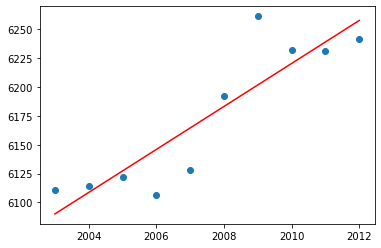

In [90]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [91]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.793868969450865

In [92]:
all_act_2012_res_p25_64_slope = model.coef_
all_act_2012_res_p25_64_slope

array([[18.63767599]])

#### 2003-2019 Regression

In [93]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_res_p25_64_hpd, all_act_2004_res_p25_64_hpd, all_act_2005_res_p25_64_hpd,
                                   all_act_2006_res_p25_64_hpd, all_act_2007_res_p25_64_hpd, all_act_2008_res_p25_64_hpd,
                                   all_act_2009_res_p25_64_hpd, all_act_2010_res_p25_64_hpd, all_act_2011_res_p25_64_hpd,
                                   all_act_2012_res_p25_64_hpd, all_act_2013_res_p25_64_hpd, all_act_2014_res_p25_64_hpd,
                                   all_act_2015_res_p25_64_hpd, all_act_2016_res_p25_64_hpd, all_act_2017_res_p25_64_hpd,
                                   all_act_2018_res_p25_64_hpd, all_act_2019_res_p25_64_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

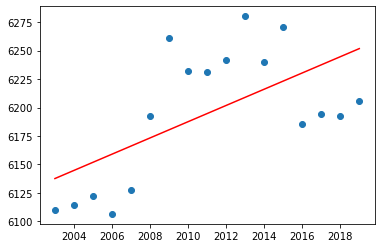

In [94]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [95]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.3718872078620016

In [96]:
all_act_2019_res_p25_64_slope = model.coef_
all_act_2019_res_p25_64_slope

array([[7.13176534]])

### 2003-2019 NonResidential - Age Between 25 and 64 

In [97]:
#non-residential = 2,4,5,6,7,8,9,10,11,30,31,32

In [98]:
nonresidential_location = [2,4,5,6,7,8,9,10,11,30,31,32]
atus_multi_yr_nonres_p25_64 = multi_merged_p25_64[multi_merged_p25_64["TEWHERE"].isin(nonresidential_location)]
#atus_multi_yr_res_p25_64

In [99]:
atus_2003_nonres_p25_64 = atus_multi_yr_nonres_p25_64[atus_multi_yr_nonres_p25_64["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_nonres_p25_64 = atus_multi_yr_nonres_p25_64[atus_multi_yr_nonres_p25_64["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_nonres_p25_64 = atus_multi_yr_nonres_p25_64[atus_multi_yr_nonres_p25_64["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_nonres_p25_64 = atus_multi_yr_nonres_p25_64[atus_multi_yr_nonres_p25_64["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_nonres_p25_64 = atus_multi_yr_nonres_p25_64[atus_multi_yr_nonres_p25_64["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_nonres_p25_64 = atus_multi_yr_nonres_p25_64[atus_multi_yr_nonres_p25_64["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_nonres_p25_64 = atus_multi_yr_nonres_p25_64[atus_multi_yr_nonres_p25_64["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_nonres_p25_64 = atus_multi_yr_nonres_p25_64[atus_multi_yr_nonres_p25_64["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_nonres_p25_64 = atus_multi_yr_nonres_p25_64[atus_multi_yr_nonres_p25_64["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_nonres_p25_64 = atus_multi_yr_nonres_p25_64[atus_multi_yr_nonres_p25_64["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_nonres_p25_64 = atus_multi_yr_nonres_p25_64[atus_multi_yr_nonres_p25_64["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_nonres_p25_64 = atus_multi_yr_nonres_p25_64[atus_multi_yr_nonres_p25_64["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_nonres_p25_64 = atus_multi_yr_nonres_p25_64[atus_multi_yr_nonres_p25_64["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_nonres_p25_64 = atus_multi_yr_nonres_p25_64[atus_multi_yr_nonres_p25_64["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_nonres_p25_64 = atus_multi_yr_nonres_p25_64[atus_multi_yr_nonres_p25_64["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_nonres_p25_64 = atus_multi_yr_nonres_p25_64[atus_multi_yr_nonres_p25_64["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_nonres_p25_64 = atus_multi_yr_nonres_p25_64[atus_multi_yr_nonres_p25_64["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_nonres_p25_64

### 2003 All Activities - NonResidential - Age Between 25 and 64 

In [100]:
atus_2003_all_nonres_p25_64 = atus_2003_nonres_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_all_nonres_p25_64

In [101]:
atus_2003_all_nonres_p25_64_merge = pd.merge(atus_2003_all_nonres_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_all_res_p25_64_merge

In [102]:
atus_2003_all_nonres_p25_64_merge["Multiplied Weight"]=atus_2003_all_nonres_p25_64_merge["TUACTDUR24"]*atus_2003_all_nonres_p25_64_merge["TUFNWGTP"]
#atus_2003_all_nonres_p25_64_merge

In [103]:
atus_2003_all_nonres_p25_64_multiplied_weight = atus_2003_all_nonres_p25_64_merge["Multiplied Weight"].sum()
atus_2003_all_nonres_p25_64_multiplied_weight

19446533305532.684

In [104]:
all_act_2003_nonres_p25_64_hpd = atus_2003_all_nonres_p25_64_multiplied_weight / atus_2003_p25_64_weight / 60
all_act_2003_nonres_p25_64_hpd

5.879771389992224

### 2004 All Activities - NonResidential - Age Between 25 and 64 

In [105]:
atus_2004_all_nonres_p25_64 = atus_2004_nonres_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_all_nonres_p25_64

In [106]:
atus_2004_all_nonres_p25_64_merge = pd.merge(atus_2004_all_nonres_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2004_all_res_p25_64_merge

In [107]:
atus_2004_all_nonres_p25_64_merge["Multiplied Weight"]=atus_2004_all_nonres_p25_64_merge["TUACTDUR24"]*atus_2004_all_nonres_p25_64_merge["TUFNWGTP"]

atus_2004_all_nonres_p25_64_multiplied_weight = atus_2004_all_nonres_p25_64_merge["Multiplied Weight"].sum()
atus_2004_all_nonres_p25_64_multiplied_weight

19802464312477.25

In [108]:
all_act_2004_nonres_p25_64_hpd = atus_2004_all_nonres_p25_64_multiplied_weight / atus_2004_p25_64_weight / 60
all_act_2004_nonres_p25_64_hpd

5.919742201945997

### 2005 All Activities - NonResidential - Age Between 25 and 64 

In [109]:
atus_2005_all_nonres_p25_64 = atus_2005_nonres_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_all_nonres_p25_64

In [110]:
atus_2005_all_nonres_p25_64_merge = pd.merge(atus_2005_all_nonres_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2005_all_res_p25_64_merge

In [111]:
atus_2005_all_nonres_p25_64_merge["Multiplied Weight"]=atus_2005_all_nonres_p25_64_merge["TUACTDUR24"]*atus_2005_all_nonres_p25_64_merge["TUFNWGTP"]

atus_2005_all_nonres_p25_64_multiplied_weight = atus_2005_all_nonres_p25_64_merge["Multiplied Weight"].sum()
atus_2005_all_nonres_p25_64_multiplied_weight

19968417665787.62

In [112]:
all_act_2005_nonres_p25_64_hpd = atus_2005_all_nonres_p25_64_multiplied_weight / atus_2005_p25_64_weight / 60
all_act_2005_nonres_p25_64_hpd

5.907703852815129

### 2006 All Activities - NonResidential - Age Between 25 and 64 

In [113]:
atus_2006_all_nonres_p25_64 = atus_2006_nonres_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_all_nonres_p25_64

In [114]:
atus_2006_all_nonres_p25_64_merge = pd.merge(atus_2006_all_nonres_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2006_all_res_p25_64_merge

In [115]:
atus_2006_all_nonres_p25_64_merge["Multiplied Weight"]=atus_2006_all_nonres_p25_64_merge["TUACTDUR24"]*atus_2006_all_nonres_p25_64_merge["TUFNWGTP"]

atus_2006_all_nonres_p25_64_multiplied_weight = atus_2006_all_nonres_p25_64_merge["Multiplied Weight"].sum()
atus_2006_all_nonres_p25_64_multiplied_weight

20340017321743.477

In [116]:
all_act_2006_nonres_p25_64_hpd = atus_2006_all_nonres_p25_64_multiplied_weight / atus_2006_p25_64_weight / 60
all_act_2006_nonres_p25_64_hpd

5.943304645573703

### 2007 All Activities - NonResidential - Age Between 25 and 64 

In [117]:
atus_2007_all_nonres_p25_64 = atus_2007_nonres_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_all_nonres_p25_64

In [118]:
atus_2007_all_nonres_p25_64_merge = pd.merge(atus_2007_all_nonres_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2007_all_res_p25_64_merge

In [119]:
atus_2007_all_nonres_p25_64_merge["Multiplied Weight"]=atus_2007_all_nonres_p25_64_merge["TUACTDUR24"]*atus_2007_all_nonres_p25_64_merge["TUFNWGTP"]

atus_2007_all_nonres_p25_64_multiplied_weight = atus_2007_all_nonres_p25_64_merge["Multiplied Weight"].sum()
atus_2007_all_nonres_p25_64_multiplied_weight

20502494275381.734

In [120]:
all_act_2007_nonres_p25_64_hpd = atus_2007_all_nonres_p25_64_multiplied_weight / atus_2007_p25_64_weight / 60
all_act_2007_nonres_p25_64_hpd

5.916301292902543

### 2008 All Activities - NonResidential - Age Between 25 and 64 

In [121]:
atus_2008_all_nonres_p25_64 = atus_2008_nonres_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_all_nonres_p25_64

In [122]:
atus_2008_all_nonres_p25_64_merge = pd.merge(atus_2008_all_nonres_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2008_all_res_p25_64_merge

In [123]:
atus_2008_all_nonres_p25_64_merge["Multiplied Weight"]=atus_2008_all_nonres_p25_64_merge["TUACTDUR24"]*atus_2008_all_nonres_p25_64_merge["TUFNWGTP"]

atus_2008_all_nonres_p25_64_multiplied_weight = atus_2008_all_nonres_p25_64_merge["Multiplied Weight"].sum()
atus_2008_all_nonres_p25_64_multiplied_weight

20042644558165.24

In [124]:
all_act_2008_nonres_p25_64_hpd = atus_2008_all_nonres_p25_64_multiplied_weight / atus_2008_p25_64_weight / 60
all_act_2008_nonres_p25_64_hpd

5.7350129454875

### 2009 All Activities - NonResidential - Age Between 25 and 64 

In [125]:
atus_2009_all_nonres_p25_64 = atus_2009_nonres_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_all_nonres_p25_64

In [126]:
atus_2009_all_nonres_p25_64_merge = pd.merge(atus_2009_all_nonres_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2009_all_res_p25_64_merge

In [127]:
atus_2009_all_nonres_p25_64_merge["Multiplied Weight"]=atus_2009_all_nonres_p25_64_merge["TUACTDUR24"]*atus_2009_all_nonres_p25_64_merge["TUFNWGTP"]

atus_2009_all_nonres_p25_64_multiplied_weight = atus_2009_all_nonres_p25_64_merge["Multiplied Weight"].sum()
atus_2009_all_nonres_p25_64_multiplied_weight

19495743852082.008

In [128]:
all_act_2009_nonres_p25_64_hpd = atus_2009_all_nonres_p25_64_multiplied_weight / atus_2009_p25_64_weight / 60
all_act_2009_nonres_p25_64_hpd

5.555440082463012

### 2010 All Activities - NonResidential - Age Between 25 and 64 

In [129]:
atus_2010_all_nonres_p25_64 = atus_2010_nonres_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_all_nonres_p25_64

In [130]:
atus_2010_all_nonres_p25_64_merge = pd.merge(atus_2010_all_nonres_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2010_all_res_p25_64_merge

In [131]:
atus_2010_all_nonres_p25_64_merge["Multiplied Weight"]=atus_2010_all_nonres_p25_64_merge["TUACTDUR24"]*atus_2010_all_nonres_p25_64_merge["TUFNWGTP"]

atus_2010_all_nonres_p25_64_multiplied_weight = atus_2010_all_nonres_p25_64_merge["Multiplied Weight"].sum()
atus_2010_all_nonres_p25_64_multiplied_weight

19677955905239.594

In [132]:
all_act_2010_nonres_p25_64_hpd = atus_2010_all_nonres_p25_64_multiplied_weight / atus_2010_p25_64_weight / 60
all_act_2010_nonres_p25_64_hpd

5.574556418161181

### 2011 All Activities - NonResidential - Age Between 25 and 64 

In [133]:
atus_2011_all_nonres_p25_64 = atus_2011_nonres_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_all_nonres_p25_64

In [134]:
atus_2011_all_nonres_p25_64_merge = pd.merge(atus_2011_all_nonres_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2011_all_res_p25_64_merge

In [135]:
atus_2011_all_nonres_p25_64_merge["Multiplied Weight"]=atus_2011_all_nonres_p25_64_merge["TUACTDUR24"]*atus_2011_all_nonres_p25_64_merge["TUFNWGTP"]

atus_2011_all_nonres_p25_64_multiplied_weight = atus_2011_all_nonres_p25_64_merge["Multiplied Weight"].sum()
atus_2011_all_nonres_p25_64_multiplied_weight

19834017980787.797

In [136]:
all_act_2011_nonres_p25_64_hpd = atus_2011_all_nonres_p25_64_multiplied_weight / atus_2011_p25_64_weight / 60
all_act_2011_nonres_p25_64_hpd

5.600723012115676

### 2012 All Activities - NonResidential - Age Between 25 and 64 

In [137]:
atus_2012_all_nonres_p25_64 = atus_2012_nonres_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_all_nonres_p25_64

In [138]:
atus_2012_all_nonres_p25_64_merge = pd.merge(atus_2012_all_nonres_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2012_all_res_p25_64_merge

In [139]:
atus_2012_all_nonres_p25_64_merge["Multiplied Weight"]=atus_2012_all_nonres_p25_64_merge["TUACTDUR24"]*atus_2012_all_nonres_p25_64_merge["TUFNWGTP"]

atus_2012_all_nonres_p25_64_multiplied_weight = atus_2012_all_nonres_p25_64_merge["Multiplied Weight"].sum()
atus_2012_all_nonres_p25_64_multiplied_weight

19942400903900.883

In [140]:
all_act_2012_nonres_p25_64_hpd = atus_2012_all_nonres_p25_64_multiplied_weight / atus_2012_p25_64_weight / 60
all_act_2012_nonres_p25_64_hpd

5.583836899956372

### 2013 All Activities - NonResidential - Age Between 25 and 64 

In [141]:
atus_2013_all_nonres_p25_64 = atus_2013_nonres_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_all_nonres_p25_64

In [142]:
atus_2013_all_nonres_p25_64_merge = pd.merge(atus_2013_all_nonres_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2013_all_res_p25_64_merge

In [143]:
atus_2013_all_nonres_p25_64_merge["Multiplied Weight"]=atus_2013_all_nonres_p25_64_merge["TUACTDUR24"]*atus_2013_all_nonres_p25_64_merge["TUFNWGTP"]

atus_2013_all_nonres_p25_64_multiplied_weight = atus_2013_all_nonres_p25_64_merge["Multiplied Weight"].sum()
atus_2013_all_nonres_p25_64_multiplied_weight

19687753945985.754

In [144]:
all_act_2013_nonres_p25_64_hpd = atus_2013_all_nonres_p25_64_multiplied_weight / atus_2013_p25_64_weight / 60
all_act_2013_nonres_p25_64_hpd

5.500727736078349

### 2014 All Activities - NonResidential - Age Between 25 and 64 

In [145]:
atus_2014_all_nonres_p25_64 = atus_2014_nonres_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_all_nonres_p25_64

In [146]:
atus_2014_all_nonres_p25_64_merge = pd.merge(atus_2014_all_nonres_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2014_all_res_p25_64_merge

In [147]:
atus_2014_all_nonres_p25_64_merge["Multiplied Weight"]=atus_2014_all_nonres_p25_64_merge["TUACTDUR24"]*atus_2014_all_nonres_p25_64_merge["TUFNWGTP"]

atus_2014_all_nonres_p25_64_multiplied_weight = atus_2014_all_nonres_p25_64_merge["Multiplied Weight"].sum()
atus_2014_all_nonres_p25_64_multiplied_weight

20340455571699.85

In [148]:
all_act_2014_nonres_p25_64_hpd = atus_2014_all_nonres_p25_64_multiplied_weight / atus_2014_p25_64_weight / 60
all_act_2014_nonres_p25_64_hpd

5.653836118357266

### 2015 All Activities - NonResidential - Age Between 25 and 64 

In [149]:
atus_2015_all_nonres_p25_64 = atus_2015_nonres_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_all_nonres_p25_64

In [150]:
atus_2015_all_nonres_p25_64_merge = pd.merge(atus_2015_all_nonres_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2015_all_res_p25_64_merge

In [151]:
atus_2015_all_nonres_p25_64_merge["Multiplied Weight"]=atus_2015_all_nonres_p25_64_merge["TUACTDUR24"]*atus_2015_all_nonres_p25_64_merge["TUFNWGTP"]

atus_2015_all_nonres_p25_64_multiplied_weight = atus_2015_all_nonres_p25_64_merge["Multiplied Weight"].sum()
atus_2015_all_nonres_p25_64_multiplied_weight

20041150242348.914

In [152]:
all_act_2015_nonres_p25_64_hpd = atus_2015_all_nonres_p25_64_multiplied_weight / atus_2015_p25_64_weight / 60
all_act_2015_nonres_p25_64_hpd

5.522552115221482

### 2016 All Activities - NonResidential - Age Between 25 and 64 

In [153]:
atus_2016_all_nonres_p25_64 = atus_2016_nonres_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_all_nonres_p25_64

In [154]:
atus_2016_all_nonres_p25_64_merge = pd.merge(atus_2016_all_nonres_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2016_all_res_p25_64_merge

In [155]:
atus_2016_all_nonres_p25_64_merge["Multiplied Weight"]=atus_2016_all_nonres_p25_64_merge["TUACTDUR24"]*atus_2016_all_nonres_p25_64_merge["TUFNWGTP"]

atus_2016_all_nonres_p25_64_multiplied_weight = atus_2016_all_nonres_p25_64_merge["Multiplied Weight"].sum()
atus_2016_all_nonres_p25_64_multiplied_weight

20892692918611.49

In [156]:
all_act_2016_nonres_p25_64_hpd = atus_2016_all_nonres_p25_64_multiplied_weight / atus_2016_p25_64_weight / 60
all_act_2016_nonres_p25_64_hpd

5.694414325939056

### 2017 All Activities - NonResidential - Age Between 25 and 64 

In [157]:
atus_2017_all_nonres_p25_64 = atus_2017_nonres_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_all_nonres_p25_64

In [158]:
atus_2017_all_nonres_p25_64_merge = pd.merge(atus_2017_all_nonres_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2017_all_res_p25_64_merge

In [159]:
atus_2017_all_nonres_p25_64_merge["Multiplied Weight"]=atus_2017_all_nonres_p25_64_merge["TUACTDUR24"]*atus_2017_all_nonres_p25_64_merge["TUFNWGTP"]

atus_2017_all_nonres_p25_64_multiplied_weight = atus_2017_all_nonres_p25_64_merge["Multiplied Weight"].sum()
atus_2017_all_nonres_p25_64_multiplied_weight

20798326314605.785

In [160]:
all_act_2017_nonres_p25_64_hpd = atus_2017_all_nonres_p25_64_multiplied_weight / atus_2017_p25_64_weight / 60
all_act_2017_nonres_p25_64_hpd

5.673523604693754

### 2018 All Activities - NonResidential - Age Between 25 and 64 

In [161]:
atus_2018_all_nonres_p25_64 = atus_2018_nonres_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_all_nonres_p25_64

In [162]:
atus_2018_all_nonres_p25_64_merge = pd.merge(atus_2018_all_nonres_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2018_all_res_p25_64_merge

In [163]:
atus_2018_all_nonres_p25_64_merge["Multiplied Weight"]=atus_2018_all_nonres_p25_64_merge["TUACTDUR24"]*atus_2018_all_nonres_p25_64_merge["TUFNWGTP"]

atus_2018_all_nonres_p25_64_multiplied_weight = atus_2018_all_nonres_p25_64_merge["Multiplied Weight"].sum()
atus_2018_all_nonres_p25_64_multiplied_weight

21051683848441.83

In [164]:
all_act_2018_nonres_p25_64_hpd = atus_2018_all_nonres_p25_64_multiplied_weight / atus_2018_p25_64_weight / 60
all_act_2018_nonres_p25_64_hpd

5.704720417040221

### 2019 All Activities - NonResidential - Age Between 25 and 64 

In [165]:
atus_2019_all_nonres_p25_64 = atus_2019_nonres_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_all_nonres_p25_64

In [166]:
atus_2019_all_nonres_p25_64_merge = pd.merge(atus_2019_all_nonres_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2019_all_res_p25_64_merge

In [167]:
atus_2019_all_nonres_p25_64_merge["Multiplied Weight"]=atus_2019_all_nonres_p25_64_merge["TUACTDUR24"]*atus_2019_all_nonres_p25_64_merge["TUFNWGTP"]

atus_2019_all_nonres_p25_64_multiplied_weight = atus_2019_all_nonres_p25_64_merge["Multiplied Weight"].sum()
atus_2019_all_nonres_p25_64_multiplied_weight

20758545646086.28

In [168]:
all_act_2019_nonres_p25_64_hpd = atus_2019_all_nonres_p25_64_multiplied_weight / atus_2019_p25_64_weight / 60
all_act_2019_nonres_p25_64_hpd

5.6246303766878984

### Regresssion: All Activities - NonResidential - Age Between 25 and 64 

#### 2003 -2012 Regression

In [169]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_nonres_p25_64_hpd, all_act_2004_nonres_p25_64_hpd, all_act_2005_nonres_p25_64_hpd,
                                   all_act_2006_nonres_p25_64_hpd, all_act_2007_nonres_p25_64_hpd, all_act_2008_nonres_p25_64_hpd,
                                   all_act_2009_nonres_p25_64_hpd, all_act_2010_nonres_p25_64_hpd, all_act_2011_nonres_p25_64_hpd,
                                   all_act_2012_nonres_p25_64_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

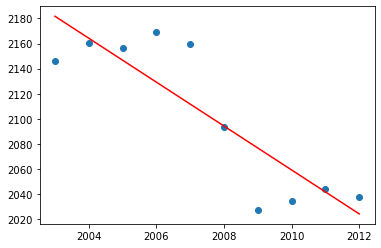

In [170]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [171]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.7490367241706872

In [172]:
all_act_2012_nonres_p25_64_slope = model.coef_
all_act_2012_nonres_p25_64_slope

array([[-17.4916051]])

#### 2003 -2019 Regression

In [173]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_nonres_p25_64_hpd, all_act_2004_nonres_p25_64_hpd, all_act_2005_nonres_p25_64_hpd,
                                   all_act_2006_nonres_p25_64_hpd, all_act_2007_nonres_p25_64_hpd, all_act_2008_nonres_p25_64_hpd,
                                   all_act_2009_nonres_p25_64_hpd, all_act_2010_nonres_p25_64_hpd, all_act_2011_nonres_p25_64_hpd,
                                   all_act_2012_nonres_p25_64_hpd, all_act_2013_nonres_p25_64_hpd, all_act_2014_nonres_p25_64_hpd,
                                   all_act_2015_nonres_p25_64_hpd, all_act_2016_nonres_p25_64_hpd, all_act_2017_nonres_p25_64_hpd,
                                   all_act_2018_nonres_p25_64_hpd, all_act_2019_nonres_p25_64_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

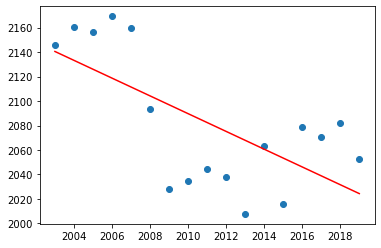

In [174]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [175]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.43591927927878815

In [176]:
all_act_2019_nonres_p25_64_slope = model.coef_
all_act_2019_nonres_p25_64_slope

array([[-7.25928201]])

## 2003-2019 Transportation - Age Between 25 and 64 

### 2003 Transportation

In [177]:
#transporation = 12, 13. 12 = Car, truck, or motorcycle (driver), 13= Car, truck, or motorcycle (passager)

In [178]:
transpoartion_location = [12,13]
atus_multi_yr_tran_p25_64 = multi_merged_p25_64[multi_merged_p25_64["TEWHERE"].isin(transpoartion_location)]
#atus_multi_yr_tran_p25_64

In [179]:
#atus transportation p25_64 population seperated by year
atus_2003_tran_p25_64 = atus_multi_yr_tran_p25_64[atus_multi_yr_tran_p25_64["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_tran_p25_64 = atus_multi_yr_tran_p25_64[atus_multi_yr_tran_p25_64["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_tran_p25_64 = atus_multi_yr_tran_p25_64[atus_multi_yr_tran_p25_64["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_tran_p25_64 = atus_multi_yr_tran_p25_64[atus_multi_yr_tran_p25_64["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_tran_p25_64 = atus_multi_yr_tran_p25_64[atus_multi_yr_tran_p25_64["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_tran_p25_64 = atus_multi_yr_tran_p25_64[atus_multi_yr_tran_p25_64["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_tran_p25_64 = atus_multi_yr_tran_p25_64[atus_multi_yr_tran_p25_64["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_tran_p25_64 = atus_multi_yr_tran_p25_64[atus_multi_yr_tran_p25_64["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_tran_p25_64 = atus_multi_yr_tran_p25_64[atus_multi_yr_tran_p25_64["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_tran_p25_64 = atus_multi_yr_tran_p25_64[atus_multi_yr_tran_p25_64["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_tran_p25_64 = atus_multi_yr_tran_p25_64[atus_multi_yr_tran_p25_64["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_tran_p25_64 = atus_multi_yr_tran_p25_64[atus_multi_yr_tran_p25_64["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_tran_p25_64 = atus_multi_yr_tran_p25_64[atus_multi_yr_tran_p25_64["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_tran_p25_64 = atus_multi_yr_tran_p25_64[atus_multi_yr_tran_p25_64["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_tran_p25_64 = atus_multi_yr_tran_p25_64[atus_multi_yr_tran_p25_64["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_tran_p25_64 = atus_multi_yr_tran_p25_64[atus_multi_yr_tran_p25_64["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_tran_p25_64 = atus_multi_yr_tran_p25_64[atus_multi_yr_tran_p25_64["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_tran_p25_64

In [180]:
atus_2003_tran_p25_64 = atus_2003_tran_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_tran_p25_64

In [181]:
atus_2003_tran_p25_64_merge = pd.merge(atus_2003_tran_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_tran_p25_64_merge

In [182]:
atus_2003_tran_p25_64_merge["Multiplied Weight"] = atus_2003_tran_p25_64_merge["TUACTDUR24"] * atus_2003_tran_p25_64_merge["TUFNWGTP"]
#atus_2003_tran_p25_64_merge

In [183]:
atus_2003_tran_p25_64_multiplied_weight = atus_2003_tran_p25_64_merge["Multiplied Weight"].sum()
atus_2003_tran_p25_64_multiplied_weight

4065818226353.311

In [184]:
atus_2003_tran_p25_64_hpd = atus_2003_tran_p25_64_multiplied_weight / atus_2003_p25_64_weight / 60
atus_2003_tran_p25_64_hpd

1.2293235667572515

### 2004 Transportation

In [185]:
atus_2004_tran_p25_64 = atus_2004_tran_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2004_tran_p25_64_merge = pd.merge(atus_2004_tran_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2004_tran_p25_64_merge

In [186]:
atus_2004_tran_p25_64_merge["Multiplied Weight"] = atus_2004_tran_p25_64_merge["TUACTDUR24"] * atus_2004_tran_p25_64_merge["TUFNWGTP"]
atus_2004_tran_p25_64_multiplied_weight = atus_2004_tran_p25_64_merge["Multiplied Weight"].sum()
atus_2004_tran_p25_64_multiplied_weight

4044328113002.6606

In [187]:
atus_2004_tran_p25_64_hpd = atus_2004_tran_p25_64_multiplied_weight / atus_2004_p25_64_weight / 60
atus_2004_tran_p25_64_hpd

1.2090101227438317

### 2005 Transportation

In [188]:
atus_2005_tran_p25_64 = atus_2005_tran_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2005_tran_p25_64_merge = pd.merge(atus_2005_tran_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2005_tran_p25_64_merge

In [189]:
atus_2005_tran_p25_64_merge["Multiplied Weight"] = atus_2005_tran_p25_64_merge["TUACTDUR24"] * atus_2005_tran_p25_64_merge["TUFNWGTP"]
atus_2005_tran_p25_64_multiplied_weight = atus_2005_tran_p25_64_merge["Multiplied Weight"].sum()
atus_2005_tran_p25_64_multiplied_weight

4017742623949.9023

In [190]:
atus_2005_tran_p25_64_hpd = atus_2005_tran_p25_64_multiplied_weight / atus_2005_p25_64_weight / 60
atus_2005_tran_p25_64_hpd

1.1886587097882697

### 2006 Transportation

In [191]:
atus_2006_tran_p25_64 = atus_2006_tran_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2006_tran_p25_64_merge = pd.merge(atus_2006_tran_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2006_tran_p25_64_merge

In [192]:
atus_2006_tran_p25_64_merge["Multiplied Weight"] = atus_2006_tran_p25_64_merge["TUACTDUR24"] * atus_2006_tran_p25_64_merge["TUFNWGTP"]
atus_2006_tran_p25_64_multiplied_weight = atus_2006_tran_p25_64_merge["Multiplied Weight"].sum()
atus_2006_tran_p25_64_multiplied_weight

4006963050603.9697

In [193]:
atus_2006_tran_p25_64_hpd = atus_2006_tran_p25_64_multiplied_weight / atus_2006_p25_64_weight / 60
atus_2006_tran_p25_64_hpd

1.1708250655145185

### 2007 Transportation

In [194]:
atus_2007_tran_p25_64 = atus_2007_tran_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2007_tran_p25_64_merge = pd.merge(atus_2007_tran_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2007_tran_p25_64_merge

In [195]:
atus_2007_tran_p25_64_merge["Multiplied Weight"] = atus_2007_tran_p25_64_merge["TUACTDUR24"] * atus_2007_tran_p25_64_merge["TUFNWGTP"]
atus_2007_tran_p25_64_multiplied_weight = atus_2007_tran_p25_64_merge["Multiplied Weight"].sum()
atus_2007_tran_p25_64_multiplied_weight

4054311686171.603

In [196]:
atus_2007_tran_p25_64_hpd = atus_2007_tran_p25_64_multiplied_weight / atus_2007_p25_64_weight / 60
atus_2007_tran_p25_64_hpd

1.1699322603654447

### 2008 Transportation

In [197]:
atus_2008_tran_p25_64 = atus_2008_tran_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2008_tran_p25_64_merge = pd.merge(atus_2008_tran_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2008_tran_p25_64_merge

In [198]:
atus_2008_tran_p25_64_merge["Multiplied Weight"] = atus_2008_tran_p25_64_merge["TUACTDUR24"] * atus_2008_tran_p25_64_merge["TUFNWGTP"]
atus_2008_tran_p25_64_multiplied_weight = atus_2008_tran_p25_64_merge["Multiplied Weight"].sum()
atus_2008_tran_p25_64_multiplied_weight

4003262168348.5786

In [199]:
atus_2008_tran_p25_64_hpd = atus_2008_tran_p25_64_multiplied_weight / atus_2008_p25_64_weight / 60
atus_2008_tran_p25_64_hpd

1.1454955603803398

### 2009 Transportation

In [200]:
atus_2009_tran_p25_64 = atus_2009_tran_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2009_tran_p25_64_merge = pd.merge(atus_2009_tran_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2009_tran_p25_64_merge

In [201]:
atus_2009_tran_p25_64_merge["Multiplied Weight"] = atus_2009_tran_p25_64_merge["TUACTDUR24"] * atus_2009_tran_p25_64_merge["TUFNWGTP"]
atus_2009_tran_p25_64_multiplied_weight = atus_2009_tran_p25_64_merge["Multiplied Weight"].sum()
atus_2009_tran_p25_64_multiplied_weight

3999764285093.799

In [202]:
atus_2009_tran_p25_64_hpd = atus_2009_tran_p25_64_multiplied_weight / atus_2009_p25_64_weight / 60
atus_2009_tran_p25_64_hpd

1.139759067333105

### 2010 Transportation

In [203]:
atus_2010_tran_p25_64 = atus_2010_tran_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2010_tran_p25_64_merge = pd.merge(atus_2010_tran_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2010_tran_p25_64_merge

In [204]:
atus_2010_tran_p25_64_merge["Multiplied Weight"] = atus_2010_tran_p25_64_merge["TUACTDUR24"] * atus_2010_tran_p25_64_merge["TUFNWGTP"]
atus_2010_tran_p25_64_multiplied_weight = atus_2010_tran_p25_64_merge["Multiplied Weight"].sum()
atus_2010_tran_p25_64_multiplied_weight

4214427269522.582

In [205]:
atus_2010_tran_p25_64_hpd = atus_2010_tran_p25_64_multiplied_weight / atus_2010_p25_64_weight / 60
atus_2010_tran_p25_64_hpd

1.1939025932025311

### 2011 Transportation

In [206]:
atus_2011_tran_p25_64 = atus_2011_tran_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2011_tran_p25_64_merge = pd.merge(atus_2011_tran_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2011_tran_p25_64_merge

In [207]:
atus_2011_tran_p25_64_merge["Multiplied Weight"] = atus_2011_tran_p25_64_merge["TUACTDUR24"] * atus_2011_tran_p25_64_merge["TUFNWGTP"]
atus_2011_tran_p25_64_multiplied_weight = atus_2011_tran_p25_64_merge["Multiplied Weight"].sum()
atus_2011_tran_p25_64_multiplied_weight

4159154115439.3047

In [208]:
atus_2011_tran_p25_64_hpd = atus_2011_tran_p25_64_multiplied_weight / atus_2011_p25_64_weight / 60
atus_2011_tran_p25_64_hpd

1.174460474314408

### 2012 Transportation

In [209]:
atus_2012_tran_p25_64 = atus_2012_tran_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2012_tran_p25_64_merge = pd.merge(atus_2012_tran_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2012_tran_p25_64_merge

In [210]:
atus_2012_tran_p25_64_merge["Multiplied Weight"] = atus_2012_tran_p25_64_merge["TUACTDUR24"] * atus_2012_tran_p25_64_merge["TUFNWGTP"]
atus_2012_tran_p25_64_multiplied_weight = atus_2012_tran_p25_64_merge["Multiplied Weight"].sum()
atus_2012_tran_p25_64_multiplied_weight

4141708692758.5293

In [211]:
atus_2012_tran_p25_64_hpd = atus_2012_tran_p25_64_multiplied_weight / atus_2012_p25_64_weight / 60
atus_2012_tran_p25_64_hpd

1.1596710917074886

### 2013 Transportation

In [212]:
atus_2013_tran_p25_64 = atus_2013_tran_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2013_tran_p25_64_merge = pd.merge(atus_2013_tran_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2013_tran_p25_64_merge

In [213]:
atus_2013_tran_p25_64_merge["Multiplied Weight"] = atus_2013_tran_p25_64_merge["TUACTDUR24"] * atus_2013_tran_p25_64_merge["TUFNWGTP"]
atus_2013_tran_p25_64_multiplied_weight = atus_2013_tran_p25_64_merge["Multiplied Weight"].sum()
atus_2013_tran_p25_64_multiplied_weight

4105622359349.9355

In [214]:
atus_2013_tran_p25_64_hpd = atus_2013_tran_p25_64_multiplied_weight / atus_2013_p25_64_weight / 60
atus_2013_tran_p25_64_hpd

1.14710448169454

### 2014 Transportation

In [215]:
atus_2014_tran_p25_64 = atus_2014_tran_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2014_tran_p25_64_merge = pd.merge(atus_2014_tran_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2014_tran_p25_64_merge

In [216]:
atus_2014_tran_p25_64_merge["Multiplied Weight"] = atus_2014_tran_p25_64_merge["TUACTDUR24"] * atus_2014_tran_p25_64_merge["TUFNWGTP"]
atus_2014_tran_p25_64_multiplied_weight = atus_2014_tran_p25_64_merge["Multiplied Weight"].sum()
atus_2014_tran_p25_64_multiplied_weight

3986474566398.167

In [217]:
atus_2014_tran_p25_64_hpd = atus_2014_tran_p25_64_multiplied_weight / atus_2014_p25_64_weight / 60
atus_2014_tran_p25_64_hpd

1.1080810756162924

### 2015 Transportation

In [218]:
atus_2015_tran_p25_64 = atus_2015_tran_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2015_tran_p25_64_merge = pd.merge(atus_2015_tran_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2015_tran_p25_64_merge

In [219]:
atus_2015_tran_p25_64_merge["Multiplied Weight"] = atus_2015_tran_p25_64_merge["TUACTDUR24"] * atus_2015_tran_p25_64_merge["TUFNWGTP"]
atus_2015_tran_p25_64_multiplied_weight = atus_2015_tran_p25_64_merge["Multiplied Weight"].sum()
atus_2015_tran_p25_64_multiplied_weight

4211415859495.5244

In [220]:
atus_2015_tran_p25_64_hpd = atus_2015_tran_p25_64_multiplied_weight / atus_2015_p25_64_weight / 60
atus_2015_tran_p25_64_hpd

1.160500434440553

### 2016 Transportation

In [221]:
atus_2016_tran_p25_64 = atus_2016_tran_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2016_tran_p25_64_merge = pd.merge(atus_2016_tran_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2016_tran_p25_64_merge

In [222]:
atus_2016_tran_p25_64_merge["Multiplied Weight"] = atus_2016_tran_p25_64_merge["TUACTDUR24"] * atus_2016_tran_p25_64_merge["TUFNWGTP"]
atus_2016_tran_p25_64_multiplied_weight = atus_2016_tran_p25_64_merge["Multiplied Weight"].sum()
atus_2016_tran_p25_64_multiplied_weight

4414758922530.568

In [223]:
atus_2016_tran_p25_64_hpd = atus_2016_tran_p25_64_multiplied_weight / atus_2016_p25_64_weight / 60
atus_2016_tran_p25_64_hpd

1.203265972077289

### 2017 Transportation

In [224]:
atus_2017_tran_p25_64 = atus_2017_tran_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2017_tran_p25_64_merge = pd.merge(atus_2017_tran_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2017_tran_p25_64_merge

In [225]:
atus_2017_tran_p25_64_merge["Multiplied Weight"] = atus_2017_tran_p25_64_merge["TUACTDUR24"] * atus_2017_tran_p25_64_merge["TUFNWGTP"]
atus_2017_tran_p25_64_multiplied_weight = atus_2017_tran_p25_64_merge["Multiplied Weight"].sum()
atus_2017_tran_p25_64_multiplied_weight

4362098793136.4062

In [226]:
atus_2017_tran_p25_64_hpd = atus_2017_tran_p25_64_multiplied_weight / atus_2017_p25_64_weight / 60
atus_2017_tran_p25_64_hpd

1.1899260591697578

### 2018 Transportation

In [227]:
atus_2018_tran_p25_64 = atus_2018_tran_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2018_tran_p25_64_merge = pd.merge(atus_2018_tran_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2018_tran_p25_64_merge

In [228]:
atus_2018_tran_p25_64_merge["Multiplied Weight"] = atus_2018_tran_p25_64_merge["TUACTDUR24"] * atus_2018_tran_p25_64_merge["TUFNWGTP"]
atus_2018_tran_p25_64_multiplied_weight = atus_2018_tran_p25_64_merge["Multiplied Weight"].sum()
atus_2018_tran_p25_64_multiplied_weight

4328242234363.8486

In [229]:
atus_2018_tran_p25_64_hpd = atus_2018_tran_p25_64_multiplied_weight / atus_2018_p25_64_weight / 60
atus_2018_tran_p25_64_hpd

1.1728948630443548

### 2019 Transportation

In [230]:
atus_2019_tran_p25_64 = atus_2019_tran_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2019_tran_p25_64_merge = pd.merge(atus_2019_tran_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2019_tran_p25_64_merge

In [231]:
atus_2019_tran_p25_64_merge["Multiplied Weight"] = atus_2019_tran_p25_64_merge["TUACTDUR24"] * atus_2019_tran_p25_64_merge["TUFNWGTP"]
atus_2019_tran_p25_64_multiplied_weight = atus_2019_tran_p25_64_merge["Multiplied Weight"].sum()
atus_2019_tran_p25_64_multiplied_weight

4495572293508.766

In [232]:
atus_2019_tran_p25_64_hpd = atus_2019_tran_p25_64_multiplied_weight / atus_2019_p25_64_weight / 60
atus_2019_tran_p25_64_hpd

1.2180974965090186

### Regresssion: Transportation - Age Between 25 and 64 

#### 2003 -2012 Regression

In [233]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_tran_p25_64_hpd, atus_2004_tran_p25_64_hpd, atus_2005_tran_p25_64_hpd,
                                   atus_2006_tran_p25_64_hpd, atus_2007_tran_p25_64_hpd, atus_2008_tran_p25_64_hpd,
                                   atus_2009_tran_p25_64_hpd, atus_2010_tran_p25_64_hpd, atus_2011_tran_p25_64_hpd,
                                   atus_2012_tran_p25_64_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

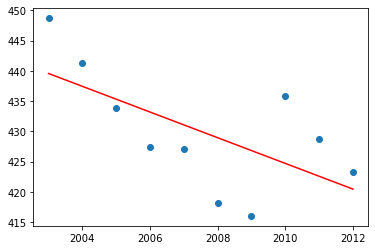

In [234]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [235]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.4021711006815607

In [236]:
tran_2012_p25_64_slope = model.coef_
tran_2012_p25_64_slope

array([[-2.1239352]])

#### 2003 -2019 Regression

In [237]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_tran_p25_64_hpd, atus_2004_tran_p25_64_hpd, atus_2005_tran_p25_64_hpd,
                                   atus_2006_tran_p25_64_hpd, atus_2007_tran_p25_64_hpd, atus_2008_tran_p25_64_hpd,
                                   atus_2009_tran_p25_64_hpd, atus_2010_tran_p25_64_hpd, atus_2011_tran_p25_64_hpd,
                                   atus_2012_tran_p25_64_hpd, atus_2013_tran_p25_64_hpd, atus_2014_tran_p25_64_hpd,
                                   atus_2015_tran_p25_64_hpd, atus_2016_tran_p25_64_hpd, atus_2017_tran_p25_64_hpd,
                                   atus_2018_tran_p25_64_hpd, atus_2019_tran_p25_64_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

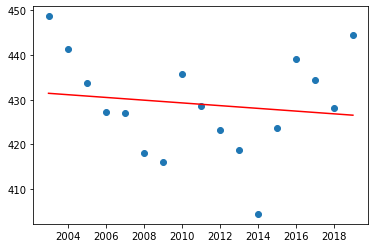

In [238]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [239]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.018661539552126016

In [240]:
tran_2019_p25_64_slope = model.coef_
tran_2019_p25_64_slope

array([[-0.30624053]])

### 2003-2019 - Unspecified- Age Between 25 and 64 

In [241]:
#unspecified = 89, 89 = Unspecified place

In [242]:
unspecified_location = [89]
atus_multi_yr_unsp_p25_64 = multi_merged_p25_64[multi_merged_p25_64["TEWHERE"].isin(unspecified_location)]
atus_multi_yr_unsp_p25_64

,TUCASEID,TUACTDUR24,TUCUMDUR,TRTIER1P,TRTIER2P,TRCODEP,TEWHERE,TEAGE,TUFNWGTP,TUSTARTTIM,TUSTOPTIME,TUYEAR
373,20030100015941,15,905,04,0405,040507,89,28,1.423997e+06,18:50:00,19:05:00,2003
1237,20030101031030,129,510,13,1301,130131,89,58,2.080731e+06,10:21:00,12:30:00,2003
1315,20030101031047,4,232,03,0301,030112,89,46,3.792077e+06,07:48:00,07:52:00,2003
1324,20030101031047,5,672,03,0301,030111,89,46,3.792077e+06,15:07:00,15:12:00,2003
1325,20030101031047,1,673,03,0301,030112,89,46,3.792077e+06,15:12:00,15:13:00,2003
...,...,...,...,...,...,...,...,...,...,...,...,...
4113263,20191211191445,30,750,13,1301,130131,89,47,1.127632e+07,16:00:00,16:30:00,2019
4117901,20191211192382,45,395,13,1301,130131,89,54,4.213571e+06,09:50:00,10:35:00,2019
4118322,20191211192468,5,810,04,0405,040507,89,42,3.042547e+06,17:25:00,17:30:00,2019
4118327,20191211192468,5,985,04,0405,040507,89,42,3.042547e+06,20:20:00,20:25:00,2019


In [243]:
#atus transportation p25_64 population seperated by year
#unsp = unspecified
atus_2003_unsp_p25_64 = atus_multi_yr_unsp_p25_64[atus_multi_yr_unsp_p25_64["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_unsp_p25_64 = atus_multi_yr_unsp_p25_64[atus_multi_yr_unsp_p25_64["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_unsp_p25_64 = atus_multi_yr_unsp_p25_64[atus_multi_yr_unsp_p25_64["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_unsp_p25_64 = atus_multi_yr_unsp_p25_64[atus_multi_yr_unsp_p25_64["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_unsp_p25_64 = atus_multi_yr_unsp_p25_64[atus_multi_yr_unsp_p25_64["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_unsp_p25_64 = atus_multi_yr_unsp_p25_64[atus_multi_yr_unsp_p25_64["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_unsp_p25_64 = atus_multi_yr_unsp_p25_64[atus_multi_yr_unsp_p25_64["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_unsp_p25_64 = atus_multi_yr_unsp_p25_64[atus_multi_yr_unsp_p25_64["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_unsp_p25_64 = atus_multi_yr_unsp_p25_64[atus_multi_yr_unsp_p25_64["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_unsp_p25_64 = atus_multi_yr_unsp_p25_64[atus_multi_yr_unsp_p25_64["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_unsp_p25_64 = atus_multi_yr_unsp_p25_64[atus_multi_yr_unsp_p25_64["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_unsp_p25_64 = atus_multi_yr_unsp_p25_64[atus_multi_yr_unsp_p25_64["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_unsp_p25_64 = atus_multi_yr_unsp_p25_64[atus_multi_yr_unsp_p25_64["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_unsp_p25_64 = atus_multi_yr_unsp_p25_64[atus_multi_yr_unsp_p25_64["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_unsp_p25_64 = atus_multi_yr_unsp_p25_64[atus_multi_yr_unsp_p25_64["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_unsp_p25_64 = atus_multi_yr_unsp_p25_64[atus_multi_yr_unsp_p25_64["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_unsp_p25_64 = atus_multi_yr_unsp_p25_64[atus_multi_yr_unsp_p25_64["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_unsp_p25_64
#atus_2004_unsp_p25_64["TRCODEP"]

### 2003 Unspecified- Age Between 25 and 64 

In [244]:
atus_2003_unsp_p25_64 = atus_2003_unsp_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24",])
#atus_2003_unsp_p25_64

In [245]:
atus_2003_unsp_p25_64_merge = pd.merge(atus_2003_unsp_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_unsp_p25_64_merge

In [246]:
atus_2003_unsp_p25_64_merge["Multiplied Weight"] = atus_2003_unsp_p25_64_merge["TUACTDUR24"] * atus_2003_unsp_p25_64_merge["TUFNWGTP"]
#atus_2003_unsp_p25_64_merge

In [247]:
atus_2003_unsp_p25_64_multiplied_weight = atus_2003_unsp_p25_64_merge["Multiplied Weight"].sum()
atus_2003_unsp_p25_64_multiplied_weight

72347295726.24776

In [248]:
atus_2003_unsp_p25_64_hpd = atus_2003_unsp_p25_64_multiplied_weight / atus_2003_p25_64_weight / 60
atus_2003_unsp_p25_64_hpd

0.021874621706146093

### 2004 Unspecified- Age Between 25 and 64 

In [249]:
atus_2004_unsp_p25_64 = atus_2004_unsp_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_unsp_p25_64

In [250]:
atus_2004_unsp_p25_64_merge = pd.merge(atus_2004_unsp_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2004_unsp_p25_64_merge["Multiplied Weight"] = atus_2004_unsp_p25_64_merge["TUACTDUR24"] * atus_2004_unsp_p25_64_merge["TUFNWGTP"]

atus_2004_unsp_p25_64_multiplied_weight = atus_2004_unsp_p25_64_merge["Multiplied Weight"].sum()
atus_2004_unsp_p25_64_multiplied_weight

36768085069.120636

In [251]:
atus_2004_unsp_p25_64_hpd = atus_2004_unsp_p25_64_multiplied_weight / atus_2004_p25_64_weight / 60
atus_2004_unsp_p25_64_hpd

0.010991439319563425

### 2005 Unspecified- Age Between 25 and 64 

In [252]:
atus_2005_unsp_p25_64 = atus_2005_unsp_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_unsp_p25_64

In [253]:
atus_2005_unsp_p25_64_merge = pd.merge(atus_2005_unsp_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2005_unsp_p25_64_merge["Multiplied Weight"] = atus_2005_unsp_p25_64_merge["TUACTDUR24"] * atus_2005_unsp_p25_64_merge["TUFNWGTP"]

atus_2005_unsp_p25_64_multiplied_weight = atus_2005_unsp_p25_64_merge["Multiplied Weight"].sum()
atus_2005_unsp_p25_64_multiplied_weight

30797288683.19909

In [254]:
atus_2005_unsp_p25_64_hpd = atus_2005_unsp_p25_64_multiplied_weight / atus_2005_p25_64_weight / 60
atus_2005_unsp_p25_64_hpd

0.00911145109518214

### 2006 Unspecified- Age Between 25 and 64 

In [255]:
atus_2006_unsp_p25_64 = atus_2006_unsp_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_unsp_p25_64

In [256]:
atus_2006_unsp_p25_64_merge = pd.merge(atus_2006_unsp_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2006_unsp_p25_64_merge["Multiplied Weight"] = atus_2006_unsp_p25_64_merge["TUACTDUR24"] * atus_2006_unsp_p25_64_merge["TUFNWGTP"]

atus_2006_unsp_p25_64_multiplied_weight = atus_2006_unsp_p25_64_merge["Multiplied Weight"].sum()
atus_2006_unsp_p25_64_multiplied_weight

45821883376.46158

In [257]:
atus_2006_unsp_p25_64_hpd = atus_2006_unsp_p25_64_multiplied_weight / atus_2006_p25_64_weight / 60
atus_2006_unsp_p25_64_hpd

0.013389045251654538

### 2007 Unspecified- Age Between 25 and 64 

In [258]:
atus_2007_unsp_p25_64 = atus_2007_unsp_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_unsp_p25_64

In [259]:
atus_2007_unsp_p25_64_merge = pd.merge(atus_2007_unsp_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2007_unsp_p25_64_merge["Multiplied Weight"] = atus_2007_unsp_p25_64_merge["TUACTDUR24"] * atus_2007_unsp_p25_64_merge["TUFNWGTP"]

atus_2007_unsp_p25_64_multiplied_weight = atus_2007_unsp_p25_64_merge["Multiplied Weight"].sum()
atus_2007_unsp_p25_64_multiplied_weight

58648402995.56801

In [260]:
atus_2007_unsp_p25_64_hpd = atus_2007_unsp_p25_64_multiplied_weight / atus_2007_p25_64_weight / 60
atus_2007_unsp_p25_64_hpd

0.016923873642339448

### 2008 Unspecified- Age Between 25 and 64 

In [261]:
atus_2008_unsp_p25_64 = atus_2008_unsp_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_unsp_p25_64

In [262]:
atus_2008_unsp_p25_64_merge = pd.merge(atus_2008_unsp_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2008_unsp_p25_64_merge["Multiplied Weight"] = atus_2008_unsp_p25_64_merge["TUACTDUR24"] * atus_2008_unsp_p25_64_merge["TUFNWGTP"]

atus_2008_unsp_p25_64_multiplied_weight = atus_2008_unsp_p25_64_merge["Multiplied Weight"].sum()
atus_2008_unsp_p25_64_multiplied_weight

52674602247.0854

In [263]:
atus_2008_unsp_p25_64_hpd = atus_2008_unsp_p25_64_multiplied_weight / atus_2008_p25_64_weight / 60
atus_2008_unsp_p25_64_hpd

0.015072338628206153

### 2009 Unspecified- Age Between 25 and 64 

In [264]:
atus_2009_unsp_p25_64 = atus_2009_unsp_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_unsp_p25_64

In [265]:
atus_2009_unsp_p25_64_merge = pd.merge(atus_2009_unsp_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2009_unsp_p25_64_merge["Multiplied Weight"] = atus_2009_unsp_p25_64_merge["TUACTDUR24"] * atus_2009_unsp_p25_64_merge["TUFNWGTP"]

atus_2009_unsp_p25_64_multiplied_weight = atus_2009_unsp_p25_64_merge["Multiplied Weight"].sum()
atus_2009_unsp_p25_64_multiplied_weight

58790790543.54204

In [266]:
atus_2009_unsp_p25_64_hpd = atus_2009_unsp_p25_64_multiplied_weight / atus_2009_p25_64_weight / 60
atus_2009_unsp_p25_64_hpd

0.01675282137185042

### 2010 Unspecified- Age Between 25 and 64 

In [267]:
atus_2010_unsp_p25_64 = atus_2010_unsp_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_unsp_p25_64

In [268]:
atus_2010_unsp_p25_64_merge = pd.merge(atus_2010_unsp_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2010_unsp_p25_64_merge["Multiplied Weight"] = atus_2010_unsp_p25_64_merge["TUACTDUR24"] * atus_2010_unsp_p25_64_merge["TUFNWGTP"]

atus_2010_unsp_p25_64_multiplied_weight = atus_2010_unsp_p25_64_merge["Multiplied Weight"].sum()
atus_2010_unsp_p25_64_multiplied_weight

66854067925.725395

In [269]:
atus_2010_unsp_p25_64_hpd = atus_2010_unsp_p25_64_multiplied_weight / atus_2010_p25_64_weight / 60
atus_2010_unsp_p25_64_hpd

0.01893904911822183

### 2011 Unspecified- Age Between 25 and 64 

In [270]:
atus_2011_unsp_p25_64 = atus_2011_unsp_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_unsp_p25_64

In [271]:
atus_2011_unsp_p25_64_merge = pd.merge(atus_2011_unsp_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2011_unsp_p25_64_merge["Multiplied Weight"] = atus_2011_unsp_p25_64_merge["TUACTDUR24"] * atus_2011_unsp_p25_64_merge["TUFNWGTP"]

atus_2011_unsp_p25_64_multiplied_weight = atus_2011_unsp_p25_64_merge["Multiplied Weight"].sum()
atus_2011_unsp_p25_64_multiplied_weight

67961094047.71211

In [272]:
atus_2011_unsp_p25_64_hpd = atus_2011_unsp_p25_64_multiplied_weight / atus_2011_p25_64_weight / 60
atus_2011_unsp_p25_64_hpd

0.019190829802124665

### 2012 Unspecified- Age Between 25 and 64 

In [273]:
atus_2012_unsp_p25_64 = atus_2012_unsp_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_unsp_p25_64

In [274]:
atus_2012_unsp_p25_64_merge = pd.merge(atus_2012_unsp_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2012_unsp_p25_64_merge["Multiplied Weight"] = atus_2012_unsp_p25_64_merge["TUACTDUR24"] * atus_2012_unsp_p25_64_merge["TUFNWGTP"]

atus_2012_unsp_p25_64_multiplied_weight = atus_2012_unsp_p25_64_merge["Multiplied Weight"].sum()
atus_2012_unsp_p25_64_multiplied_weight

47597039849.86354

In [275]:
atus_2012_unsp_p25_64_hpd = atus_2012_unsp_p25_64_multiplied_weight / atus_2012_p25_64_weight / 60
atus_2012_unsp_p25_64_hpd

0.013327086779725434

### 2013 Unspecified- Age Between 25 and 64 

In [276]:
atus_2013_unsp_p25_64 = atus_2013_unsp_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_unsp_p25_64

In [277]:
atus_2013_unsp_p25_64_merge = pd.merge(atus_2013_unsp_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2013_unsp_p25_64_merge["Multiplied Weight"] = atus_2013_unsp_p25_64_merge["TUACTDUR24"] * atus_2013_unsp_p25_64_merge["TUFNWGTP"]

atus_2013_unsp_p25_64_multiplied_weight = atus_2013_unsp_p25_64_merge["Multiplied Weight"].sum()
atus_2013_unsp_p25_64_multiplied_weight

42520999819.37363

In [278]:
atus_2013_unsp_p25_64_hpd = atus_2013_unsp_p25_64_multiplied_weight / atus_2013_p25_64_weight / 60
atus_2013_unsp_p25_64_hpd

0.011880301009140833

### 2014 Unspecified- Age Between 25 and 64 

In [279]:
atus_2014_unsp_p25_64 = atus_2014_unsp_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_unsp_p25_64

In [280]:
atus_2014_unsp_p25_64_merge = pd.merge(atus_2014_unsp_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2014_unsp_p25_64_merge["Multiplied Weight"] = atus_2014_unsp_p25_64_merge["TUACTDUR24"] * atus_2014_unsp_p25_64_merge["TUFNWGTP"]

atus_2014_unsp_p25_64_multiplied_weight = atus_2014_unsp_p25_64_merge["Multiplied Weight"].sum()
atus_2014_unsp_p25_64_multiplied_weight

53324883522.744675

In [281]:
atus_2014_unsp_p25_64_hpd = atus_2014_unsp_p25_64_multiplied_weight / atus_2014_p25_64_weight / 60
atus_2014_unsp_p25_64_hpd

0.014822192718611396

### 2015 Unspecified- Age Between 25 and 64 

In [282]:
atus_2015_unsp_p25_64 = atus_2015_unsp_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_unsp_p25_64

In [283]:
atus_2015_unsp_p25_64_merge = pd.merge(atus_2015_unsp_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2015_unsp_p25_64_merge["Multiplied Weight"] = atus_2015_unsp_p25_64_merge["TUACTDUR24"] * atus_2015_unsp_p25_64_merge["TUFNWGTP"]

atus_2015_unsp_p25_64_multiplied_weight = atus_2015_unsp_p25_64_merge["Multiplied Weight"].sum()
atus_2015_unsp_p25_64_multiplied_weight

49221853024.16785

In [284]:
atus_2015_unsp_p25_64_hpd = atus_2015_unsp_p25_64_multiplied_weight / atus_2015_p25_64_weight / 60
atus_2015_unsp_p25_64_hpd

0.01356360514474539

### 2016 Unspecified- Age Between 25 and 64 

In [285]:
atus_2016_unsp_p25_64 = atus_2016_unsp_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_unsp_p25_64

In [286]:
atus_2016_unsp_p25_64_merge = pd.merge(atus_2016_unsp_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2016_unsp_p25_64_merge["Multiplied Weight"] = atus_2016_unsp_p25_64_merge["TUACTDUR24"] * atus_2016_unsp_p25_64_merge["TUFNWGTP"]

atus_2016_unsp_p25_64_multiplied_weight = atus_2016_unsp_p25_64_merge["Multiplied Weight"].sum()
atus_2016_unsp_p25_64_multiplied_weight

92857328216.12201

In [287]:
atus_2016_unsp_p25_64_hpd = atus_2016_unsp_p25_64_multiplied_weight / atus_2016_p25_64_weight / 60
atus_2016_unsp_p25_64_hpd

0.02530875757003428

### 2017 Unspecified- Age Between 25 and 64 

In [288]:
atus_2017_unsp_p25_64 = atus_2017_unsp_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_unsp_p25_64

In [289]:
atus_2017_unsp_p25_64_merge = pd.merge(atus_2017_unsp_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2017_unsp_p25_64_merge["Multiplied Weight"] = atus_2017_unsp_p25_64_merge["TUACTDUR24"] * atus_2017_unsp_p25_64_merge["TUFNWGTP"]

atus_2017_unsp_p25_64_multiplied_weight = atus_2017_unsp_p25_64_merge["Multiplied Weight"].sum()
atus_2017_unsp_p25_64_multiplied_weight

67029726353.29653

In [290]:
atus_2017_unsp_p25_64_hpd = atus_2017_unsp_p25_64_multiplied_weight / atus_2017_p25_64_weight / 60
atus_2017_unsp_p25_64_hpd

0.018284872009846576

### 2018 Unspecified- Age Between 25 and 64 

In [291]:
atus_2018_unsp_p25_64 = atus_2018_unsp_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_unsp_p25_64

In [292]:
atus_2018_unsp_p25_64_merge = pd.merge(atus_2018_unsp_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2018_unsp_p25_64_merge["Multiplied Weight"] = atus_2018_unsp_p25_64_merge["TUACTDUR24"] * atus_2018_unsp_p25_64_merge["TUFNWGTP"]

atus_2018_unsp_p25_64_multiplied_weight = atus_2018_unsp_p25_64_merge["Multiplied Weight"].sum()
atus_2018_unsp_p25_64_multiplied_weight

65128045382.00681

In [293]:
atus_2018_unsp_p25_64_hpd = atus_2018_unsp_p25_64_multiplied_weight / atus_2018_p25_64_weight / 60
atus_2018_unsp_p25_64_hpd

0.017648815785353728

### 2019 Unspecified- Age Between 25 and 64 

In [294]:
atus_2019_unsp_p25_64 = atus_2019_unsp_p25_64.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_unsp_p25_64

In [295]:
atus_2019_unsp_p25_64_merge = pd.merge(atus_2019_unsp_p25_64, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2019_unsp_p25_64_merge["Multiplied Weight"] = atus_2019_unsp_p25_64_merge["TUACTDUR24"] * atus_2019_unsp_p25_64_merge["TUFNWGTP"]

atus_2019_unsp_p25_64_multiplied_weight = atus_2019_unsp_p25_64_merge["Multiplied Weight"].sum()
atus_2019_unsp_p25_64_multiplied_weight

48153706356.935135

In [296]:
atus_2019_unsp_p25_64_hpd = atus_2019_unsp_p25_64_multiplied_weight / atus_2019_p25_64_weight / 60
atus_2019_unsp_p25_64_hpd

0.01304748435381795

### Regresssion: Unespecified - Age Between 25 and 64 

#### 2003 -2012 Regression

In [297]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_unsp_p25_64_hpd, atus_2004_unsp_p25_64_hpd, atus_2005_unsp_p25_64_hpd,
                                   atus_2006_unsp_p25_64_hpd, atus_2007_unsp_p25_64_hpd, atus_2008_unsp_p25_64_hpd,
                                   atus_2009_unsp_p25_64_hpd, atus_2010_unsp_p25_64_hpd, atus_2011_unsp_p25_64_hpd,
                                   atus_2012_unsp_p25_64_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

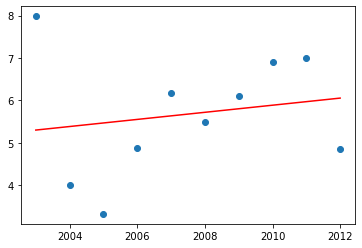

In [298]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [299]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.03096880500442889

In [300]:
all_act_2012_res_p25_64_slope = model.coef_
all_act_2012_res_p25_64_slope

array([[0.08371928]])

#### 2003-2019 Regression

In [301]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_unsp_p25_64_hpd, atus_2004_unsp_p25_64_hpd, atus_2005_unsp_p25_64_hpd,
                                   atus_2006_unsp_p25_64_hpd, atus_2007_unsp_p25_64_hpd, atus_2008_unsp_p25_64_hpd,
                                   atus_2009_unsp_p25_64_hpd, atus_2010_unsp_p25_64_hpd, atus_2011_unsp_p25_64_hpd,
                                   atus_2012_unsp_p25_64_hpd, atus_2013_unsp_p25_64_hpd, atus_2014_unsp_p25_64_hpd,
                                   atus_2015_unsp_p25_64_hpd, atus_2016_unsp_p25_64_hpd, atus_2017_unsp_p25_64_hpd,
                                   atus_2018_unsp_p25_64_hpd, atus_2019_unsp_p25_64_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

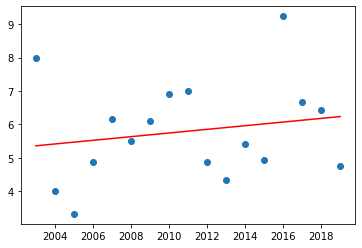

In [302]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [303]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.03392300448613894

In [304]:
all_act_2019_res_p25_64_slope = model.coef_
all_act_2019_res_p25_64_slope

array([[0.05463827]])